# Import Python Libraries





In [0]:
import pandas as pd #pandas dataframe
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
%matplotlib inline

# Load Data from Google colab after mounting the Google drive
(Your data file should be in google drive)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')
X['Gender'] = pd.get_dummies(X['Gender'])

In [0]:
X

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


# Fit the data in to KMeans Model

In [0]:
km = KMeans(n_clusters=3, random_state=1).fit(X)
pred = km.labels_
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
X['cluster'] = km.labels_
X.sort_values('cluster')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
199,200,0,30,137,83,0
162,163,0,19,81,5,0
161,162,1,29,79,83,0
160,161,1,56,79,35,0
159,160,1,30,78,73,0
...,...,...,...,...,...,...
105,106,1,21,62,42,2
104,105,0,49,62,56,2
103,104,0,26,62,55,2
101,102,1,49,62,48,2


In [0]:
ct = pd.crosstab(X['cluster'],X['Age'])
ct

Age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,63,64,65,66,67,68,69,70
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,2,1,0,0,0,0,2,0,2,4,3,5,2,9,2,4,3,5,2,2,1,1,2,1,1,2,1,1,2,1,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,2,3,3,2,3,3,1,0,2,0,2,2,5,0,1,0,6,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,1,1,2,1,0,0,0,1,1,1,0,1,1,0,1,0,1,0
2,3,4,1,2,1,3,1,0,2,2,0,0,0,1,2,0,1,0,0,0,4,2,4,0,0,2,0,1,1,3,3,4,2,1,0,0,2,1,0,1,0,2,2,2,0,1,2,3,3,0,2


In [0]:
ct = pd.crosstab(X['cluster'],X['Annual Income (k$)'])
ct

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,28,29,30,33,34,37,38,39,40,42,43,44,46,47,48,49,50,54,57,58,59,60,61,62,63,64,65,67,69,70,71,72,73,74,75,76,77,78,79,81,85,86,87,88,93,97,98,99,101,103,113,120,126,137
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,2,2,4,12,2,2,2,2,6,4,2,2,2,2,2,4,2,2,2,2
1,2,2,2,2,4,4,2,2,2,2,4,2,2,4,2,2,2,4,4,2,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,6,2,2,12,2,2,2,6,2,6,6,2,4,4,2,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
ct = pd.crosstab(X['cluster'],X['Spending Score (1-100)'])
ct

Spending Score (1-100),1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,26,27,28,29,31,32,34,35,36,39,40,41,42,43,44,45,46,47,48,...,53,54,55,56,57,58,59,60,61,63,65,66,68,69,71,72,73,74,75,76,77,78,79,81,82,83,85,86,87,88,89,90,91,92,93,94,95,97,98,99
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,3,0,1,1,0,2,0,1,2,1,2,2,2,1,2,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1,1,2,2,2,1,0,1,1,0,0,2,1,2,1,3,1,2,1,1,2,0,1,2,0,0
1,0,1,2,1,2,0,0,0,0,0,0,1,3,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,3,1,1,1,1,2,0,0,1,2,1,0,...,0,1,2,0,0,0,0,2,2,0,1,1,0,0,0,1,4,0,1,1,2,0,1,2,1,0,0,0,1,0,0,0,0,2,0,1,0,0,1,1
2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,3,6,3,1,0,4,3,5,...,1,2,5,4,2,2,5,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
stat_analysis = X.drop(columns=["Gender","CustomerID"])
centers = stat_analysis.groupby('cluster').mean()
centers

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,36.044118,88.911765,50.205882
1,36.918033,30.360656,49.737705
2,43.197183,59.352113,50.591549


In [0]:
X = X.rename(columns={'Spending Score (1-100)':'spending','Annual Income (k$)':'income'})
centers = centers.rename(columns={'Spending Score (1-100)':'spending','Annual Income (k$)':'income'})

Text(0, 0.5, 'Spending')

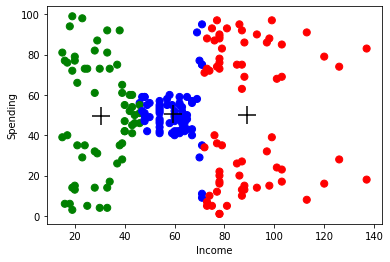

In [0]:
colors = np.array(['red','green','blue','yellow'])
plt.scatter(X.income,X.spending, c=colors[X.cluster], s=50)
plt.scatter(centers.income,centers.spending,linewidths=3, marker='+', s=300, c='black')
plt.xlabel('Income')
plt.ylabel('Spending')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8773222128>,
      dtype=object)

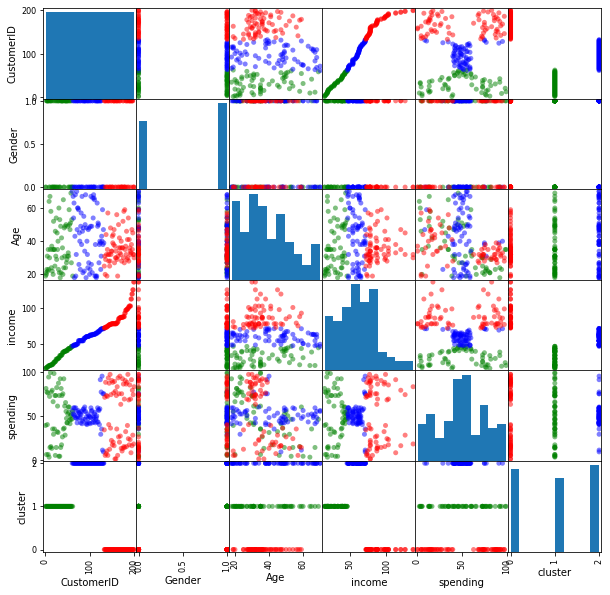

In [0]:
# scatter-plot-matrix
pd.plotting.scatter_matrix(X, c=colors[X.cluster], figsize=(10,10), s=100)

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148,
        -0.01799572],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407,
        -0.01799572],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298,
        -0.01799572],
       [-1.67144992,  0.88640526, -1.13750203, -1.70082976,  1.04041783,
        -0.01799572],
       [-1.6541292 ,  0.88640526, -0.56336851, -1.66266033, -0.39597992,
        -0.01799572]])

In [0]:
km = KMeans(n_clusters=3,random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
X['cluster']=km.labels_
X.sort_values('cluster')

,CustomerID,Gender,Age,income,spending,cluster
199,200,0,30,137,83,0
162,163,0,19,81,5,0
161,162,1,29,79,83,0
160,161,1,56,79,35,0
159,160,1,30,78,73,0
...,...,...,...,...,...,...
117,118,1,49,65,59,2
116,117,1,63,65,43,2
70,71,0,70,49,55,2
72,73,1,60,50,49,2


In [0]:
# Gender & CustomerID is not important here and it doesn't have any significance
scaled_stat_analysis = X.drop(columns=["CustomerID"])
scaled_centers = scaled_stat_analysis.drop(columns=["Gender"]).groupby('cluster').mean()
scaled_centers

,Age,income,spending
cluster,,,
0,36.044118,88.911765,50.205882
1,26.578125,39.562500,56.453125
2,53.205882,51.970588,44.308824


In [0]:
from sklearn import metrics
metrics.silhouette_score(scaled_stat_analysis, km.labels_)

0.22942540978213657

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


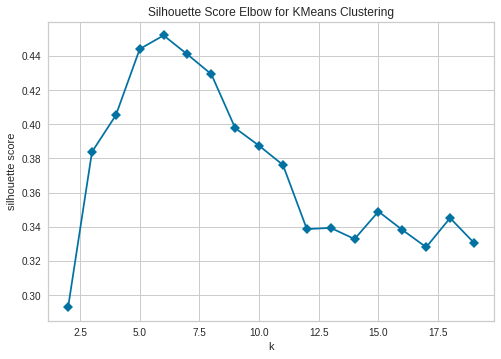

In [0]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
visualizer.fit(scaled_stat_analysis)    
visualizer.poof() 

**Maximum Silhouette Score for our dataset is at k=6. So,lets cluster our dataset with k=6**

In [0]:
km_final = KMeans(n_clusters=6,random_state=1)
km_final.fit(scaled_stat_analysis)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
X['cluster']=km_final.labels_
X.sort_values('cluster')

,CustomerID,Gender,Age,income,spending,cluster
174,175,1,52,88,13,0
148,149,1,34,78,22,0
136,137,1,44,73,7,0
172,173,0,36,87,10,0
170,171,0,40,87,13,0
...,...,...,...,...,...,...
23,24,0,31,25,73,5
29,30,1,23,29,87,5
25,26,0,29,28,82,5
11,12,1,35,19,99,5


In [0]:
scaled_centers_X = X.drop(columns=["Gender","CustomerID"]).groupby('cluster').mean()
scaled_centers_X

,Age,income,spending
cluster,,,
0,41.685714,88.228571,17.285714
1,32.692308,86.538462,82.128205
2,27.000000,56.657895,49.131579
3,44.142857,25.142857,19.523810
4,56.155556,53.377778,49.088889
5,25.272727,25.727273,79.363636


In [0]:
from sklearn import metrics
metrics.silhouette_score(scaled_stat_analysis, km_final.labels_)

0.4520084814597547

Text(0, 0.5, 'Spending')

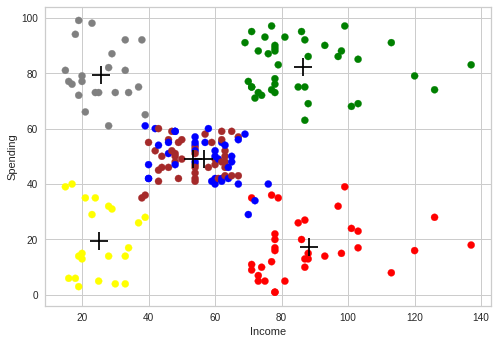

In [0]:
colors = np.array(['red','green','blue','yellow','brown','grey'])
plt.scatter(X.income,X.spending, c=colors[X.cluster], s=50)
plt.scatter(scaled_centers_X.income,scaled_centers_X.spending,linewidths=3, marker='+', s=300, c='black')
plt.xlabel('Income')
plt.ylabel('Spending')